# Assigment 1 (Vingron Part)
## Exercise 1
### A
Using networkx and python....

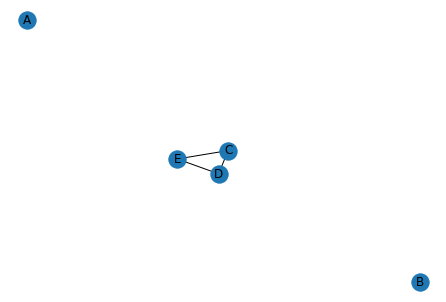

In [1]:
# includes
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mutual_info_score

plt.ion()

rpkm = np.array(
        [7, 9.2, 14.6, 20, 35.1, 
            19, 14.2, 6.6, 14.6, 18,
            8.6, 7, 6.5, 7.3, 8.7,
            6.8, 7.9, 5.5, 2.3, 2.9,
            0.9, 1.8, 3.9, 4.8, 6.2]
        ).reshape((5,5))

#nx.from_numpy_array()

from scipy.linalg import norm

from scipy.spatial import distance_matrix

from scipy.stats import entropy

# 1A
e_dist = distance_matrix(rpkm, rpkm, p=2)
e_dist

G = nx.Graph()
G.add_nodes_from("ABCDE")
G.nodes()
G = nx.convert_node_labels_to_integers(G, label_attribute="name")
G.nodes()

g = nx.from_numpy_array(e_dist < 11)

G.add_edges_from(g.edges())

G.nodes.data()
G.nodes.data('name')
namedict = dict( G.nodes.data('name'))

nx.draw_spring(G, with_labels=True, labels=namedict)


### 1B

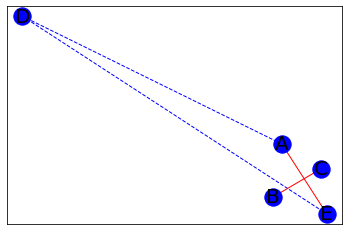

In [2]:
# 1B
cor = np.corrcoef(rpkm)

#g1b = nx.from_numpy_array(np.abs(cor) > 0.75)
#nx.draw_spring(g1b, with_labels=True, labels=namedict)

g1bb = nx.from_numpy_array(cor)

elarge = [(u, v) for (u, v, d) in g1bb.edges(data=True) if d["weight"] > 0.75]
esmall = [(u, v) for (u, v, d) in g1bb.edges(data=True) if d["weight"] < -0.75]

pos = nx.spring_layout(g1bb)
nodes = nx.draw_networkx_nodes(g1bb, pos, node_color="blue")
nx.draw_networkx_labels(g1bb, pos, font_size=20, font_family="sans-serif", labels=namedict)

nx.draw_networkx_edges(
    g1bb, pos, edgelist=esmall, edge_color="b", style="dashed"
)
nx.draw_networkx_edges(
    g1bb, pos, edgelist=elarge, edge_color="r" 
)




### 1C

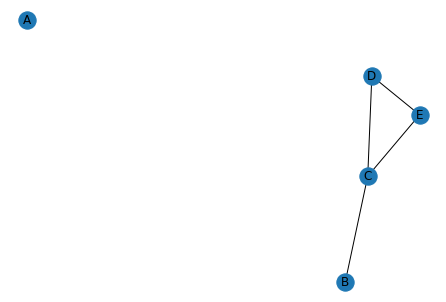

In [3]:
# 1C
l1_dist = distance_matrix(rpkm, rpkm, p=1)
l1_dist /= 5
l1_dist

g1c = nx.from_numpy_array(np.abs(l1_dist) < 7)

nx.draw_spring(g1c, with_labels=True, labels=namedict)



### 1D
Using only 3 bins resulted in a totally disconnected graph. Instead, 
we used 10 bins...

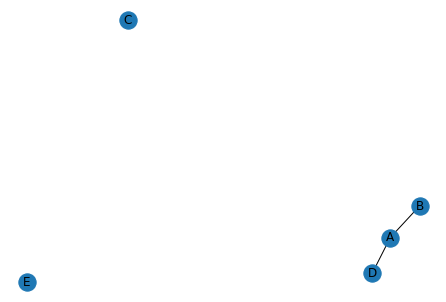

In [4]:
midist = np.zeros_like(cor)

for i in range(5):
    for j in range(5):
        x = np.digitize(rpkm[i], bins=np.linspace(0,50,10))
        y = np.digitize(rpkm[j], bins=np.linspace(0,50,10))
        #print(x,y)
        midist[i,j] = mutual_info_score(x,y)

g1d = nx.from_numpy_array(midist > 0.65)
nx.draw_spring(g1d, with_labels=True, labels=namedict)


## 2
### 2A
I had no time to calculate by hand.
The matrix below shows $x$ in the rows and $y$ in the column ($(i,j)$) is the
probability for observattion $(x,y)$ to be in bin $bin[i] * bin[j]$

In [5]:
x = [0.3, 0.98, 0.54, 0.49, 0.39, 0.14, 0.03, 0.81, 0.65, 0.18]
x = np.array(x)
y = [0.74, 0.09, 0.48, 0.15, 0.71, 0.8, 0.53, 0.95, 0.63, 0.88]
y = np.array(y)

np.digitize(x, bins=np.linspace(0,1,5))
np.digitize(y, bins=np.linspace(0,1,5))

bins=np.linspace(0,1,5)

pxy, _, _ = np.histogram2d(x,y, bins=bins)

pxy /= 10
pxy
# x is the row, y the column (so transposed compared to the pdf)


array([[0. , 0. , 0.1, 0.2],
       [0.1, 0. , 0.2, 0. ],
       [0. , 0.1, 0.1, 0. ],
       [0.1, 0. , 0. , 0.1]])

### 2B
The marginals

In [6]:
px = pxy.sum(axis=1)
py = pxy.sum(axis=0)

print("x marginal: ", px, "\nand y marginal is: ", py)


x marginal:  [0.3 0.3 0.2 0.2] 
and y marginal is:  [0.2 0.1 0.4 0.3]


## 2C
The product distribution (shown below) is clearly different than the 
joint distribution. Therefore the variables are not independent.

In [7]:
pxpy = px.reshape((4,1)) @ py.reshape((1,4))

print(pxpy)

[[0.06 0.03 0.12 0.09]
 [0.06 0.03 0.12 0.09]
 [0.04 0.02 0.08 0.06]
 [0.04 0.02 0.08 0.06]]


In [8]:


Hxy = entropy(pxy.flatten())
Hx = entropy(px)
Hy = entropy(py)
print("H(X,Y) = ", Hxy, " H(X) = ", Hx, " Hy = ", Hy)



H(X,Y) =  2.0253262207700677  H(X) =  1.366158847569202  Hy =  1.2798542258336676


In [9]:
## 2D

In [10]:
# 2D
print("p(x | y=y_3) = ", pxy[:,2], "\np(x|y=y_4) =", pxy[:,3])


p(x | y=y_3) =  [0.1 0.2 0.1 0. ] 
p(x|y=y_4) = [0.2 0.  0.  0.1]


In [11]:
## jont and marginal entorpies

In [12]:
# 2E
Hxy = entropy(pxy.flatten())
Hx = entropy(px)
Hy = entropy(py)
print("H(X,Y) = ", Hxy, " H(X) = ", Hx, " Hy = ", Hy)


H(X,Y) =  2.0253262207700677  H(X) =  1.366158847569202  Hy =  1.2798542258336676


## F
$H(Y|X)$ is confusing because in the slides it is defined as the relative
entropy of $p(x), p(Y)$.

The chain rule is:
$H(Y|X) = -\sum_x \sum_y p(x,y) \log(p(x,y) / (p(x)) = \\
= -\sum_x p(x) \sum_y p(x,y) p(x) \log(p(y | x)  = \\
= -\sum_x \sum_y p(yx,y) \log(p(x,y)) + \sum_x \sum_y p(x,y) \log(p(x)) = \\
= H(Y,X) - - \sum_x p(x)\log(p(x)) = H(Y|X) - H(X)
$

and the result is below:


In [13]:
condHyx = -pxy.T * np.log((pxy.T / px))
condHyx = np.nan_to_num(condHyx)
condHyx
condHyx.sum()




<ipython-input-13-61ab5d3bcdd1>:1: RuntimeWarning: divide by zero encountered in log
  condHyx = -pxy.T * np.log((pxy.T / px))
<ipython-input-13-61ab5d3bcdd1>:1: RuntimeWarning: invalid value encountered in multiply
  condHyx = -pxy.T * np.log((pxy.T / px))


0.6591673732008659

In [14]:
# another way:
h = 0
for x in range(4):
    for y in range(4):
        if pxy[x,y] > 0:
            h -= pxy[x,y] * np.log(pxy[x,y] / px[x])
h

0.6591673732008659

In [15]:
#  and another way: #chain rule
Hxy - Hx

0.6591673732008658

and H(X|Y):

In [16]:
## and condHxy:
condHxy = -pxy * np.log((pxy / py))
condHxy = np.nan_to_num(condHxy)
condHxy
condHxy.sum()

# another way:
h = 0
for y in range(4):
    for x in range(4):
        if pxy[x,y] > 0:
            h -= pxy[x,y] * np.log(pxy[x,y] / py[y])
h


<ipython-input-16-88cd61aec7a3>:2: RuntimeWarning: divide by zero encountered in log
  condHxy = -pxy * np.log((pxy / py))
<ipython-input-16-88cd61aec7a3>:2: RuntimeWarning: invalid value encountered in multiply
  condHxy = -pxy * np.log((pxy / py))


0.7454719949364002

## 2G
$MI(X,Y) = \sum_x \sum_x p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) = \\
\sum_x p(x) \sum_y p(y | x) \log \frac{p(y|x)}{p(y)} 
$
 I am not sure what are the two definitions for MI as we were given only one (the first one above). Anyway bothe calculation should result in the same value.
 
 We calculated $p(x)$ and $p(y|x)$ using the joint distribution $p(x,y)$ 

In [17]:
mi1 = pxy * np.log(pxy / pxpy)
mi1 = np.nan_to_num(mi1)
mi1.sum()



<ipython-input-17-3cabc300db15>:1: RuntimeWarning: divide by zero encountered in log
  mi1 = pxy * np.log(pxy / pxpy)
<ipython-input-17-3cabc300db15>:1: RuntimeWarning: invalid value encountered in multiply
  mi1 = pxy * np.log(pxy / pxpy)


0.6206868526328015

## Exercise 4
I am using Python because R sucks. But the results should be the same and
that's what matters, right?

$x$ and $y$ are independent, and therfore we should expect that their
discretisation is also independent and the mutual entropy should be close to $0$.

If we used a bigger sample, like for example $10^6$ samples each, than the experimental mutual entropy indeed approaches $0$. But $300$ is too few apparently and the MI is pretty far from $0$.



In [18]:
# 300 samples
## Exercise 4
x = np.random.rand(300)
y = np.random.rand(300)
x
y
x = np.digitize(x, np.linspace(0, 1, 11))
y = np.digitize(y, np.linspace(0, 1, 11))
mutual_info_score(x,y)


0.10555135068352688

In [19]:
## Exercise 4
## and just for fun, 1000000 samples:
x = np.random.rand(10**6)
y = np.random.rand(10**6)
x = np.digitize(x, np.linspace(0, 1, 11))
y = np.digitize(y, np.linspace(0, 1, 11))

mutual_info_score(x,y)


3.7811644321400495e-05